In [1037]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
from mpl_toolkits.mplot3d import Axes3D as trid
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

#                                                             _FIRST SHEET_

#    

In [1038]:
sh1 = pd.read_excel('C:/users/visha/downloads/rock.xlsx', header = 0, index_col = None, sheet = 0)

In [1039]:
sh1.head(7)

,Depth in,Depth fin,Depth mean,UCS,UTS,Density,Density conv.,E,Unnamed: 8,ALL ROCK TYPES
0,m,m,m,Mpa,Mpa,g/cc,kN/cubic m,Gpa,NaN,NaN
1,9,12.64,10.82,33.21,7.11,2.55944,25.5944,7.15,NaN,NaN
2,12.64,19.74,16.19,66.24,8.12,2.472,24.72,8.78,NaN,NaN
3,19.74,21,20.37,84.61,10.27,2.51659,25.1659,10.15,NaN,NaN
4,21,56.17,38.585,57.39,8.96,2.5362,25.362,12.25,NaN,NaN
5,56.17,58.71,57.44,77.53,10.36,2.49692,24.9692,9.49,NaN,NaN
6,60.22,61.35,60.785,66.48,5.3,2.51918,25.1918,9.12,NaN,NaN


In [1040]:
df1 = sh1[['Depth mean', 'UCS', 'UTS', 'Density conv.', 'E']]

In [1041]:
df1.head(7)

,Depth mean,UCS,UTS,Density conv.,E
0,m,Mpa,Mpa,kN/cubic m,Gpa
1,10.82,33.21,7.11,25.5944,7.15
2,16.19,66.24,8.12,24.72,8.78
3,20.37,84.61,10.27,25.1659,10.15
4,38.585,57.39,8.96,25.362,12.25
5,57.44,77.53,10.36,24.9692,9.49
6,60.785,66.48,5.3,25.1918,9.12


In [1042]:
df1 = df1.iloc[1:,:]

In [1043]:
df1.head(7)

,Depth mean,UCS,UTS,Density conv.,E
1,10.82,33.21,7.11,25.5944,7.15
2,16.19,66.24,8.12,24.72,8.78
3,20.37,84.61,10.27,25.1659,10.15
4,38.585,57.39,8.96,25.362,12.25
5,57.44,77.53,10.36,24.9692,9.49
6,60.785,66.48,5.3,25.1918,9.12
7,63.955,69.7,10.3,26.5304,11.21


In [1044]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 1 to 132
Data columns (total 5 columns):
Depth mean       132 non-null object
UCS              132 non-null object
UTS              132 non-null object
Density conv.    132 non-null object
E                132 non-null object
dtypes: object(5)
memory usage: 5.2+ KB


In [1045]:
df1.mean(axis = 0)

Depth mean       251.806894
UCS               56.955758
UTS                6.634697
Density conv.     25.341061
E                 11.122273
dtype: float64

In [1046]:
df1 = df1.astype(float)

In [1047]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 1 to 132
Data columns (total 5 columns):
Depth mean       132 non-null float64
UCS              132 non-null float64
UTS              132 non-null float64
Density conv.    132 non-null float64
E                132 non-null float64
dtypes: float64(5)
memory usage: 5.2 KB


In [1048]:
dsc1 = df1.describe()

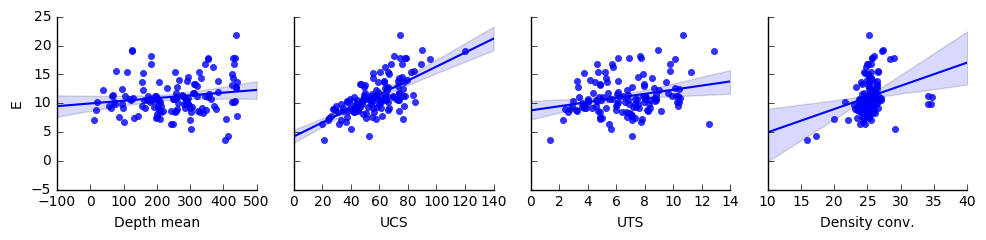

In [1049]:
sns.pairplot(df1, x_vars = ['Depth mean', 'UCS', 'UTS', 'Density conv.'], y_vars = ['E'], kind = 'reg')

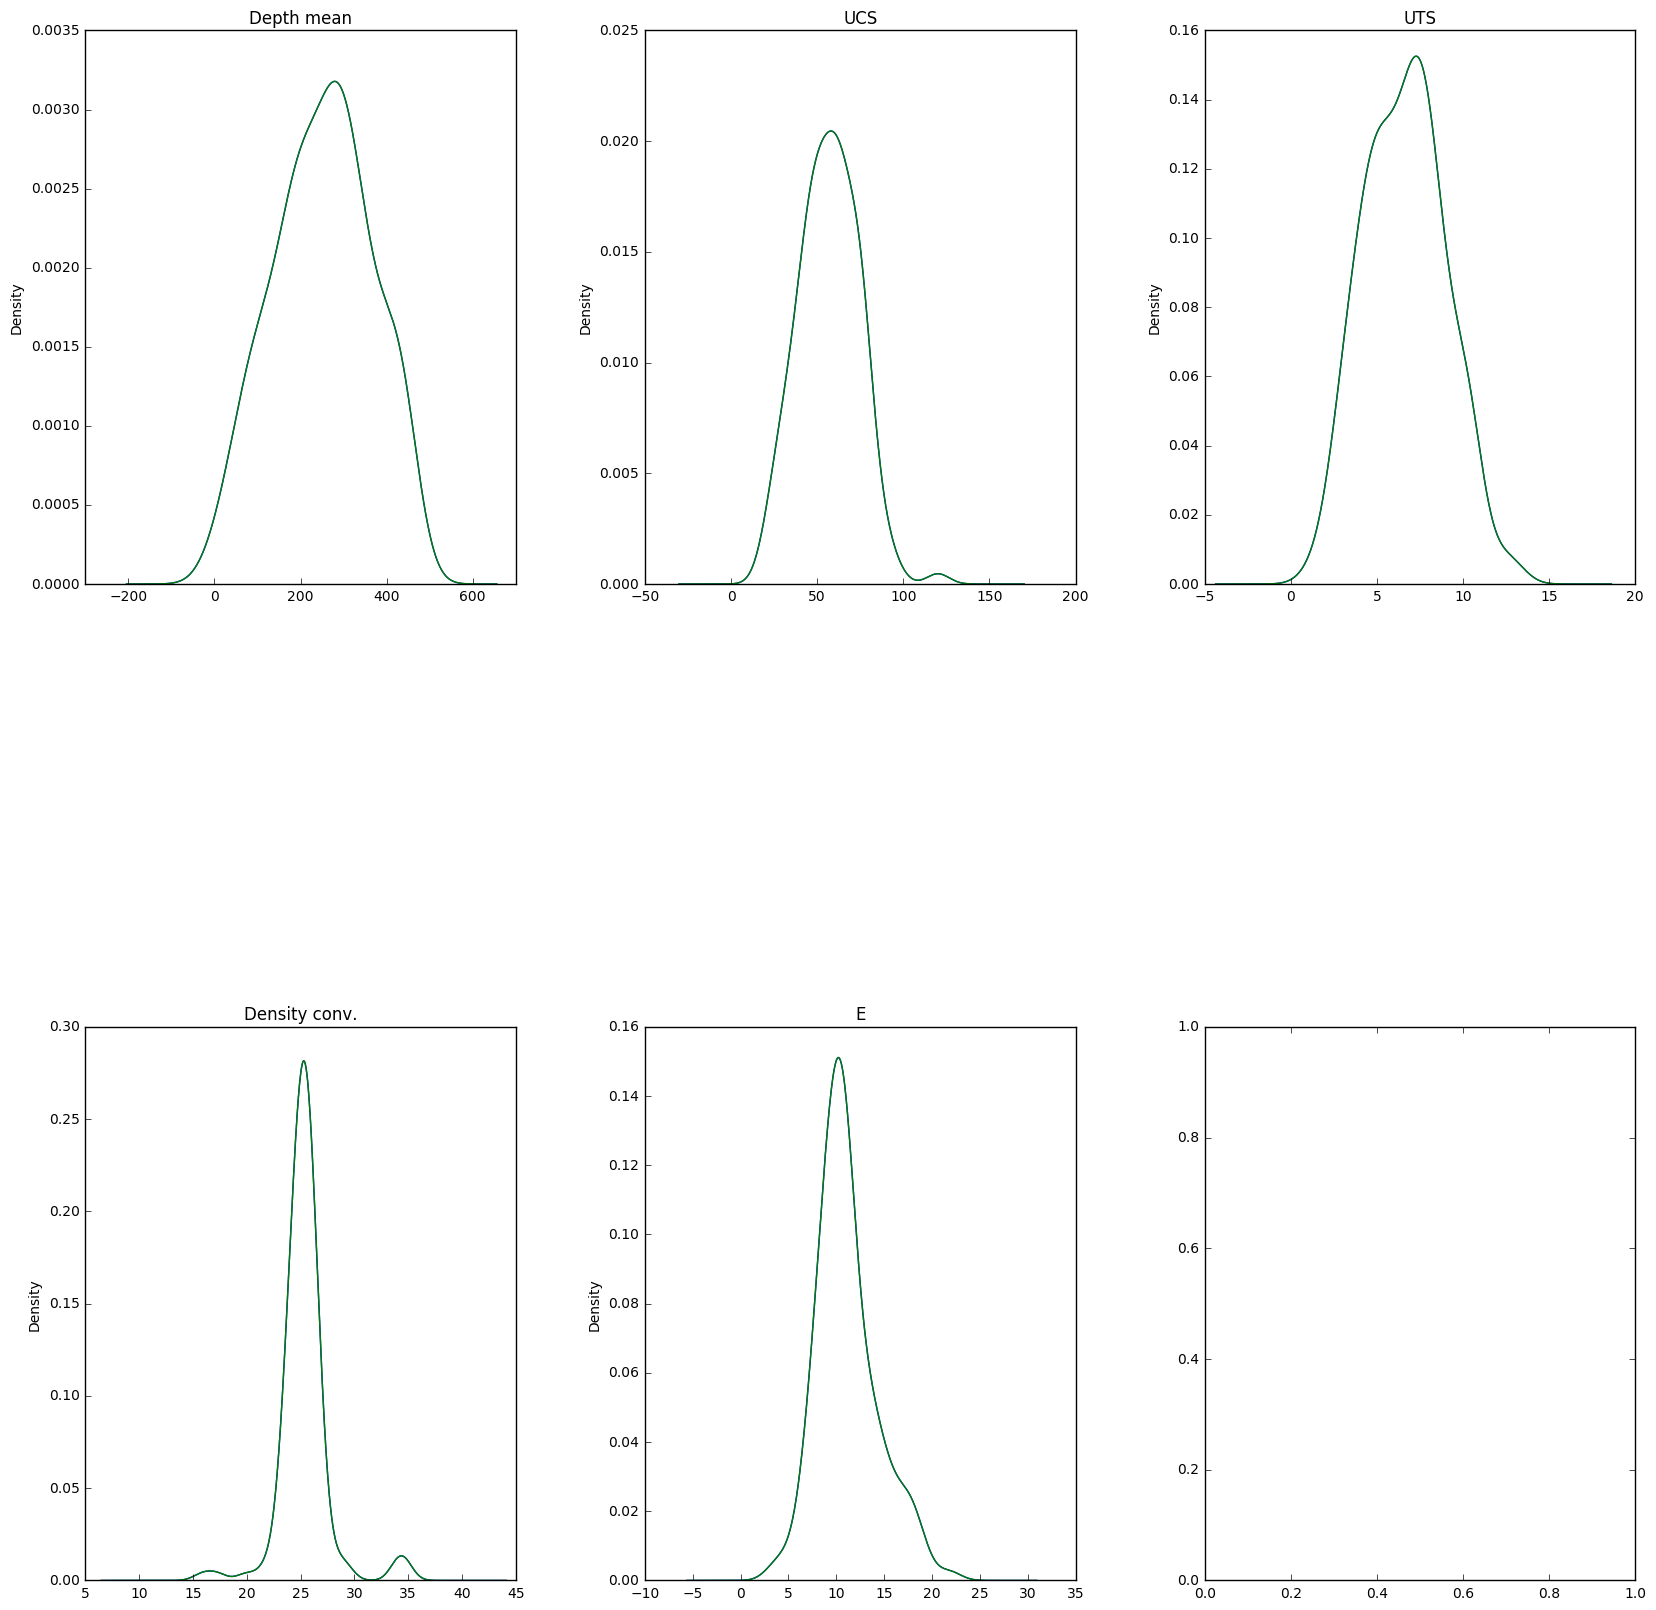

In [1050]:

%matplotlib inline


num_df1 = df1.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(2,3, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df1, axs.flat):
        g = num_df1[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [1051]:
df1['Depth mean'] = np.log(df1['Depth mean'])

In [1052]:
df1['UCS'] = np.log(df1['UCS'])

In [1053]:
df1['UTS'] = np.log(df1['UTS'])

In [1054]:
df1['Density conv.'] = np.log(df1['Density conv.'])

In [1055]:
df1['E'] = np.log(df1['E'])

In [1056]:
R_xx1 = df1.corr('spearman')

In [1057]:
R_xx1 = R_xx1.iloc[0:4, 0:4]

In [1058]:
R_xx1

,Depth mean,UCS,UTS,Density conv.
Depth mean,1.000000,-0.196679,-0.332388,-0.115691
UCS,-0.196679,1.000000,0.513105,0.476964
UTS,-0.332388,0.513105,1.000000,0.563328
Density conv.,-0.115691,0.476964,0.563328,1.000000


In [1059]:
c1 = [df1['Depth mean'].corr(df1['E']), df1['UCS'].corr(df1['E']), df1['UTS'].corr(df1['E']), df1['Density conv.'].corr(df1['E'])] 

In [1060]:
c1

[0.11447280831101067,
 0.65583560963830401,
 0.28515706878497754,
 0.41589518826430383]

In [1061]:
c_t_1 = np.transpose(c1)

In [1062]:
np.size(c_t_1)

4

In [1063]:
z1 = np.dot(c_t_1, sp.linalg.inv(R_xx1))

In [1064]:
R_xx1.shape

(4, 4)

In [1065]:
z1

array([ 0.24106729,  0.65737965, -0.06648475,  0.16769096])

In [1066]:
R_sqr_1 = np.dot(z1, c1)

In [1067]:
R_1 = np.sqrt(R_sqr_1)

In [1068]:
R_sqr_1

0.50951189728403501

# Multiple corr coeff

In [1069]:
R_1

0.71380102079223384

In [1070]:
df1.head(7)

,Depth mean,UCS,UTS,Density conv.,E
1,2.381396,3.502851,1.961502,3.242374,1.967112
2,2.784394,4.193285,2.094330,3.207613,2.172476
3,3.014063,4.438052,2.329227,3.225490,2.317474
4,3.652864,4.049870,2.192770,3.233252,2.505526
5,4.050741,4.350665,2.337952,3.217643,2.250239
6,4.107343,4.196901,1.667707,3.226519,2.210470
7,4.158180,4.244200,2.332144,3.278291,2.416806


In [1071]:
X_1 = df1[['Depth mean', 'UCS', 'UTS', 'Density conv.']]
y_1 = df1['E']

In [1072]:
clf_lr_1 = lr()

In [1073]:
clf_lr_1.fit(X_1, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Const term

In [1074]:
clf_lr_1.intercept_

-2.8567056622994129

# Coeffs

In [1075]:
clf_lr_1.coef_

array([ 0.09793381,  0.60186415, -0.10763957,  0.77222513])

In [1076]:
pred_1 = clf_lr_1.predict(X_1)

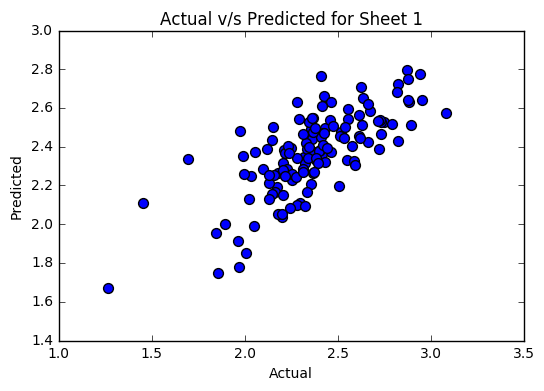

In [1077]:
%matplotlib inline
plt.scatter(y_1, pred_1, s = 50)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted for Sheet 1')

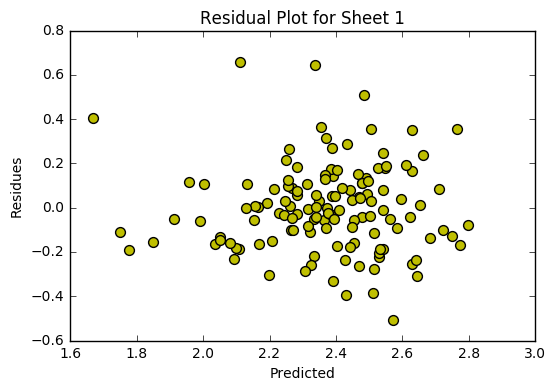

In [1078]:
plt.scatter(pred_1, pred_1 - y_1, c = 'y', s = 50)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot for Sheet 1')

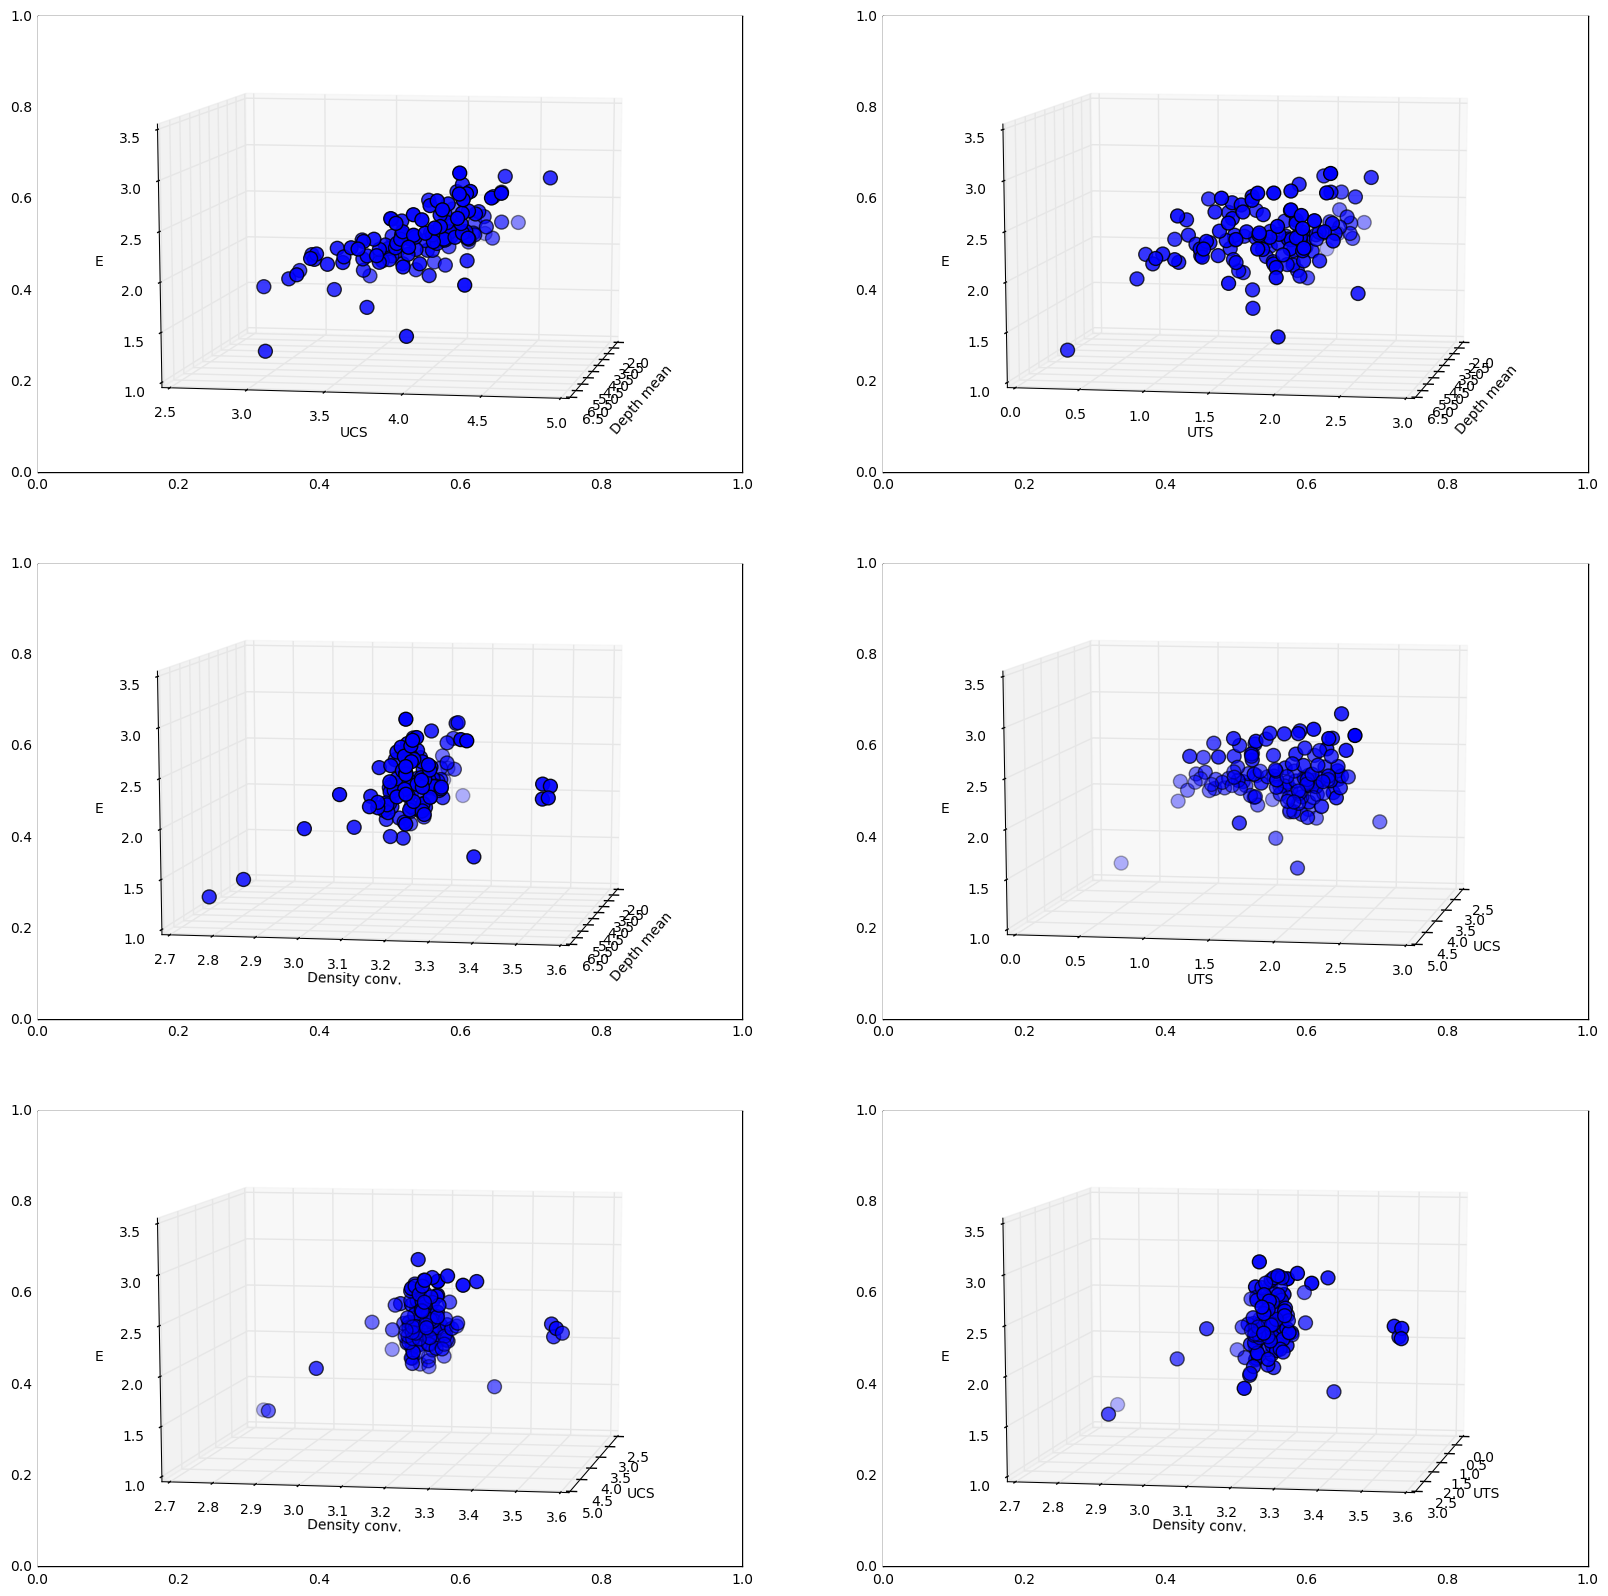

In [1079]:
fig, axs = plt.subplots(3, 2, figsize = (20, 20), squeeze = 0)
ax1 = fig.add_subplot(321, projection = '3d', xlabel = 'Depth mean', ylabel = 'UCS', zlabel = 'E')
ax2 = fig.add_subplot(322, projection = '3d', xlabel = 'Depth mean', ylabel = 'UTS', zlabel = 'E')
ax3 = fig.add_subplot(323, projection = '3d', xlabel = 'Depth mean', ylabel = 'Density conv.', zlabel = 'E')
ax4 = fig.add_subplot(324, projection = '3d', xlabel = 'UCS', ylabel = 'UTS', zlabel = 'E')
ax5 = fig.add_subplot(325, projection = '3d', xlabel = 'UCS', ylabel = 'Density conv.', zlabel = 'E')
ax6 = fig.add_subplot(326, projection = '3d', xlabel = 'UTS', ylabel = 'Density conv.', zlabel = 'E')
ax1.scatter(df1['Depth mean'].values, df1['UCS'].values, df1['E'].values, s = 100)
ax2.scatter(df1['Depth mean'].values, df1['UTS'].values, df1['E'].values, s = 100)
ax3.scatter(df1['Depth mean'].values, df1['Density conv.'].values, df1['E'].values, s = 100)
ax4.scatter(df1['UCS'].values, df1['UTS'].values, df1['E'].values, s = 100)
ax5.scatter(df1['UCS'].values, df1['Density conv.'].values, df1['E'].values, s = 100)
ax6.scatter(df1['UTS'].values, df1['Density conv.'].values, df1['E'].values, s = 100)
ax1.view_init(10, 10)
ax2.view_init(10, 10)
ax3.view_init(10, 10)
ax4.view_init(10, 10)
ax5.view_init(10, 10)
ax6.view_init(10, 10)

#  Second Sheet

##  

In [1080]:
sh2 = pd.read_excel('C:/users/visha/downloads/rock.xlsx', 'Sheet2', header = 0, index_col = None)

In [1081]:
sh2.head(7)

,Depth in,Depth fin,Depth mean,UCS,UTS,Density,Density.1,E,Unnamed: 8,CARB SST
0,m,m,m,Mpa,Mpa,g/cc,kN/cubic m,Gpa,NaN,NaN
1,78,78.41,78.205,84.27,9.75,2.66295,26.62,15.66,NaN,NaN
2,156.69,157.43,157.06,65.51,6.73,2.56442,25.64,12.31,NaN,NaN
3,174.59,175.23,174.91,64.04,7.84,2.60787,26.07,11.17,NaN,NaN
4,181.75,182.79,182.27,67.79,9.78,2.49255,24.92,16.82,NaN,NaN
5,192,195.85,193.925,65.29,6.16,2.52333,25.23,11.31,NaN,NaN
6,197.72,198.55,198.135,55.64,4.68,2.4658,24.65,10.33,NaN,NaN


In [1082]:
df2 = sh2[['Depth mean', 'UCS', 'UTS', 'Density.1', 'E']]

In [1083]:
df2.head(7)

,Depth mean,UCS,UTS,Density.1,E
0,m,Mpa,Mpa,kN/cubic m,Gpa
1,78.205,84.27,9.75,26.62,15.66
2,157.06,65.51,6.73,25.64,12.31
3,174.91,64.04,7.84,26.07,11.17
4,182.27,67.79,9.78,24.92,16.82
5,193.925,65.29,6.16,25.23,11.31
6,198.135,55.64,4.68,24.65,10.33


In [1084]:
df2 = df2.iloc[1:,:]

In [1085]:
df2.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,78.205,84.27,9.75,26.62,15.66
2,157.06,65.51,6.73,25.64,12.31
3,174.91,64.04,7.84,26.07,11.17
4,182.27,67.79,9.78,24.92,16.82
5,193.925,65.29,6.16,25.23,11.31
6,198.135,55.64,4.68,24.65,10.33
7,260.11,27.36,2.41,23.88,9.01


In [1086]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 5 columns):
Depth mean    14 non-null object
UCS           14 non-null object
UTS           14 non-null object
Density.1     14 non-null object
E             14 non-null object
dtypes: object(5)
memory usage: 644.0+ bytes


In [1087]:
df2.mean(axis = 0)

Depth mean    256.749286
UCS            58.394286
UTS             6.096429
Density.1      25.265714
E              12.638571
dtype: float64

In [1088]:
df2 = df2.astype(float)

In [1089]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 5 columns):
Depth mean    14 non-null float64
UCS           14 non-null float64
UTS           14 non-null float64
Density.1     14 non-null float64
E             14 non-null float64
dtypes: float64(5)
memory usage: 644.0 bytes


In [1090]:
dsc2 = df2.describe()

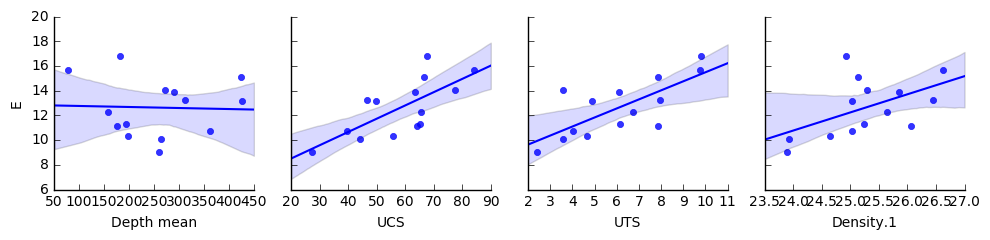

In [1091]:
sns.pairplot(df2, x_vars = ['Depth mean', 'UCS', 'UTS', 'Density.1'], y_vars = ['E'], kind = 'reg')

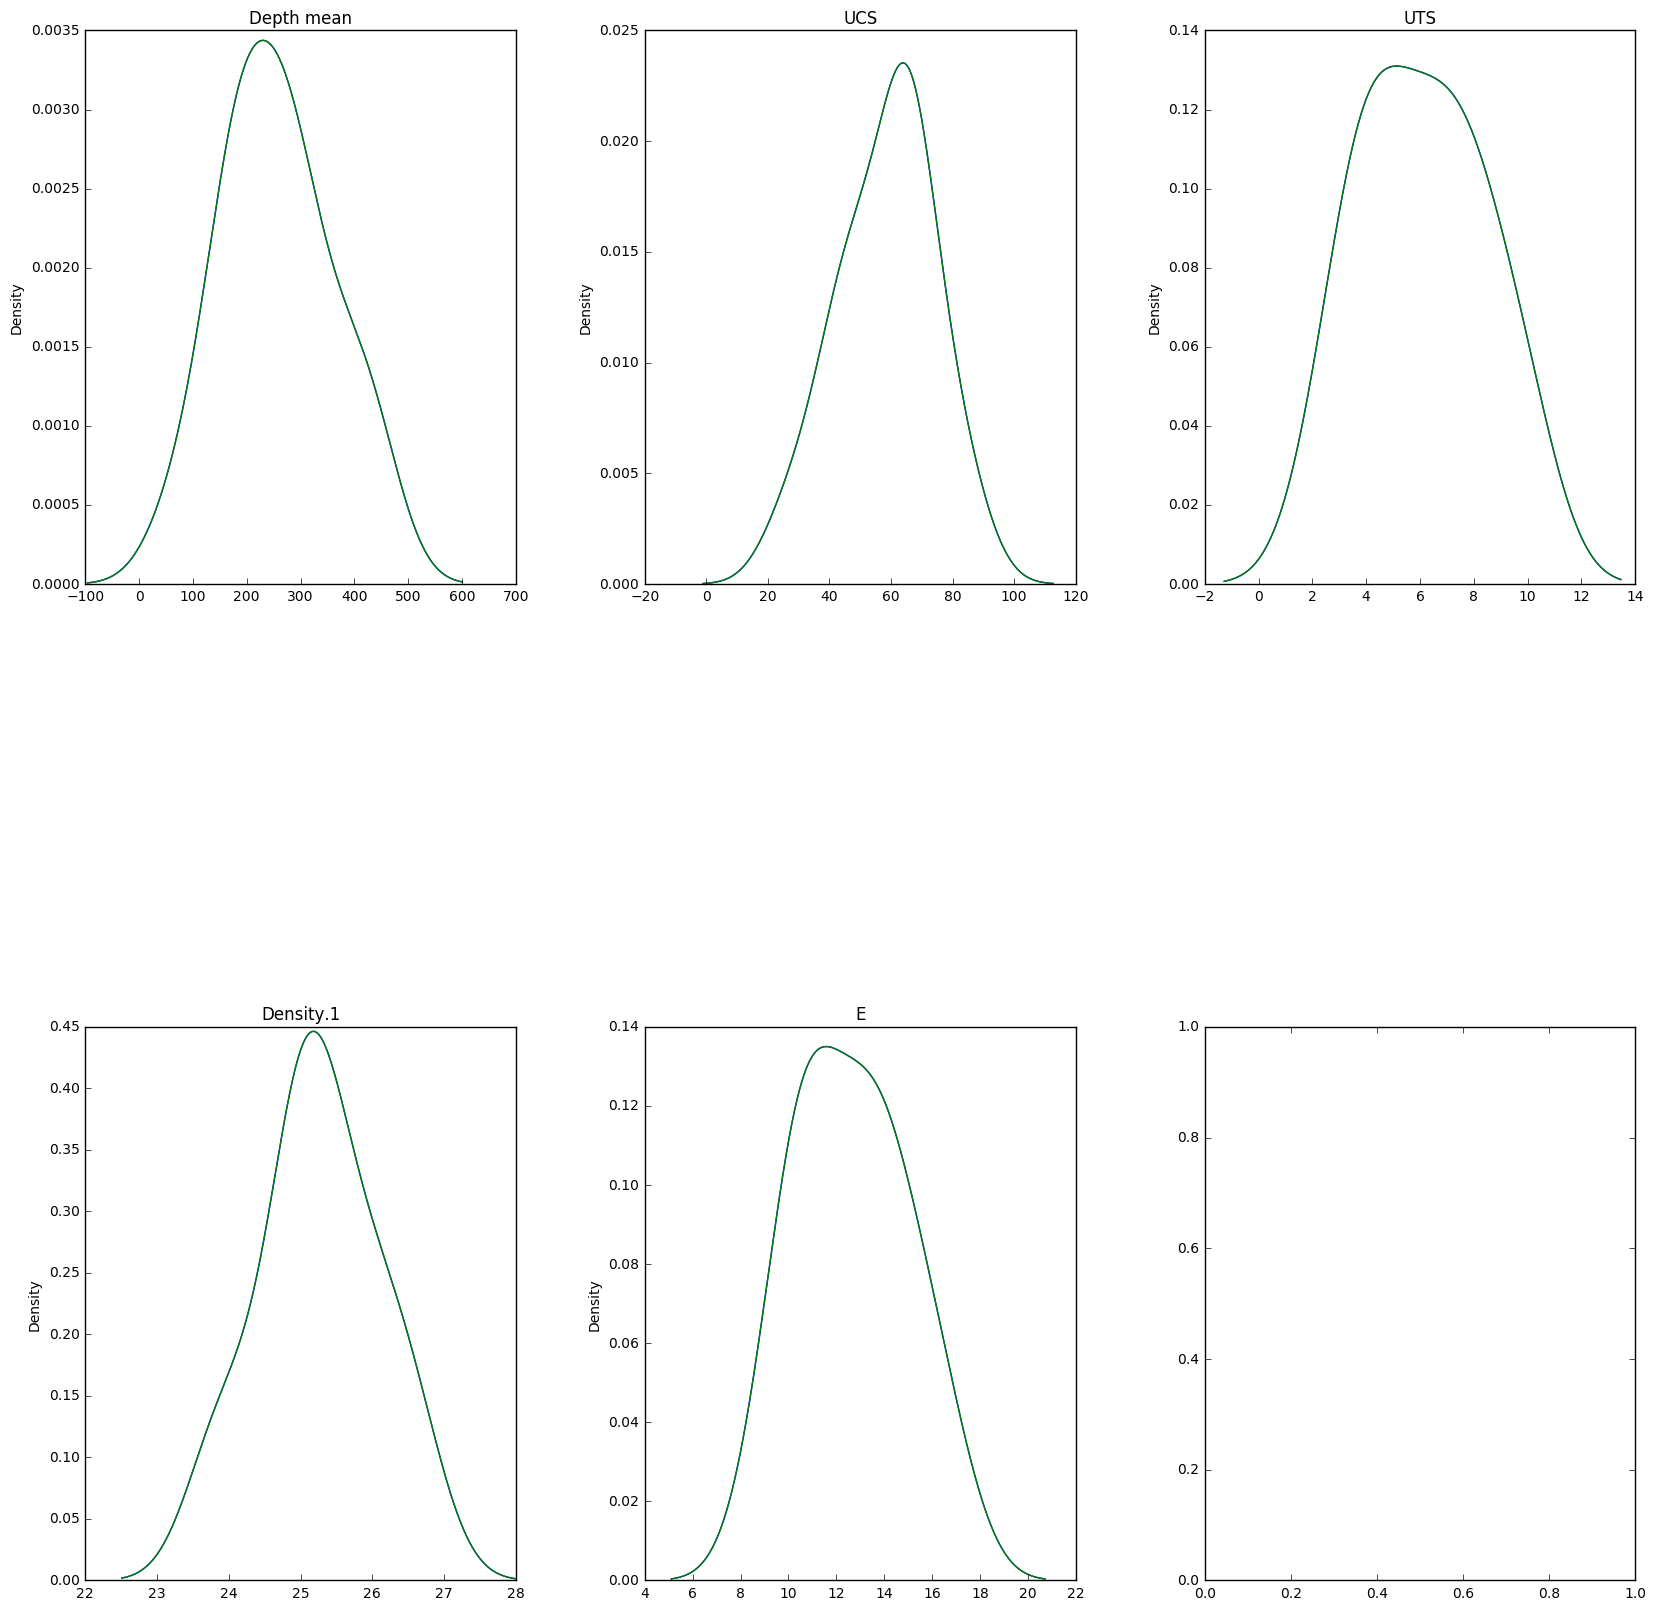

In [1092]:

%matplotlib inline


num_df2 = df2.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(2,3, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df2, axs.flat):
        g = num_df2[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [1093]:
df2['Depth mean'] = np.log(df2['Depth mean'])

In [1094]:
df2['UCS'] = np.log(df2['UCS'])

In [1095]:
df2['UTS'] = np.log(df2['UTS'])

In [1096]:
df2['Density.1'] = np.log(df2['Density.1'])

In [1097]:
df2['E'] = np.log(df2['E'])

In [1098]:
R_xx2 = df2.corr('spearman')

In [1099]:
R_xx2 = R_xx2.iloc[0:4, 0:4]

In [1100]:
R_xx2

,Depth mean,UCS,UTS,Density.1
Depth mean,1.000000,-0.446154,-0.323077,-0.226374
UCS,-0.446154,1.000000,0.600000,0.494505
UTS,-0.323077,0.600000,1.000000,0.604396
Density.1,-0.226374,0.494505,0.604396,1.000000


In [1101]:
c2 = [df2['Depth mean'].corr(df2['E']), df2['UCS'].corr(df2['E']), df2['UTS'].corr(df2['E']), df2['Density.1'].corr(df2['E'])] 

In [1102]:
c2

[-0.14551115512351351,
 0.73238025733855594,
 0.72808444201445799,
 0.56836886987224045]

In [1103]:
c_t_2 = np.transpose(c2)

In [1104]:
z2 = np.dot(c_t_2, sp.linalg.inv(R_xx2))

In [1105]:
R_xx2.shape

(4, 4)

In [1106]:
z2

array([ 0.25634456,  0.54177184,  0.42408764,  0.10217266])

In [1107]:
R_sqr_2 = np.dot(z2, c2)

In [1108]:
R_2 = np.sqrt(R_sqr_2)

In [1109]:
R_sqr_2

0.7263253816706734

# Multiple corr coeff

In [1110]:
R_2

0.85224725383580635

#    

In [1111]:
df2.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,4.359334,4.434026,2.277267,3.281663,2.751110
2,5.056628,4.182203,1.906575,3.244154,2.510412
3,5.164272,4.159508,2.059239,3.260785,2.413232
4,5.205489,4.216415,2.280339,3.215671,2.822569
5,5.267471,4.178839,1.818077,3.228034,2.425687
6,5.288949,4.018902,1.543298,3.204777,2.335052
7,5.561105,3.309082,0.879627,3.173041,2.198335


In [1112]:
X_2 = df2[['Depth mean', 'UCS', 'UTS', 'Density.1']]
y_2 = df2['E']

In [1113]:
clf_lr_2 = lr()

In [1114]:
clf_lr_2.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Const term

In [1115]:
clf_lr_2.intercept_

0.26899827272281485

# Coeffs

In [1116]:
clf_lr_2.coef_

array([ 0.12712565,  0.34096413,  0.21213489, -0.05691668])

In [1117]:
pred_2 = clf_lr_2.predict(X_2)

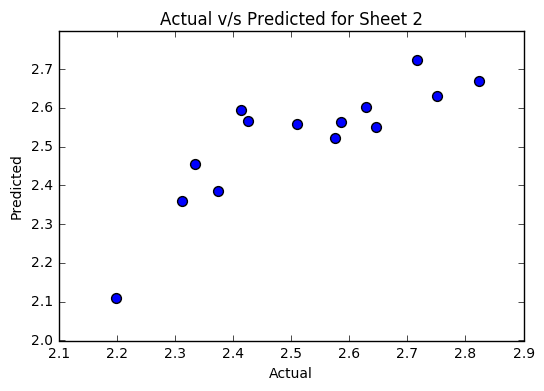

In [1118]:
%matplotlib inline
plt.scatter(y_2, pred_2, s = 50)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted for Sheet 2')

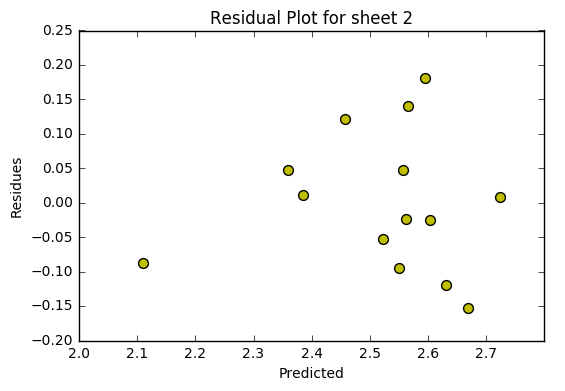

In [1119]:
plt.scatter(pred_2, pred_2 - y_2, c = 'y', s = 50)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot for sheet 2')

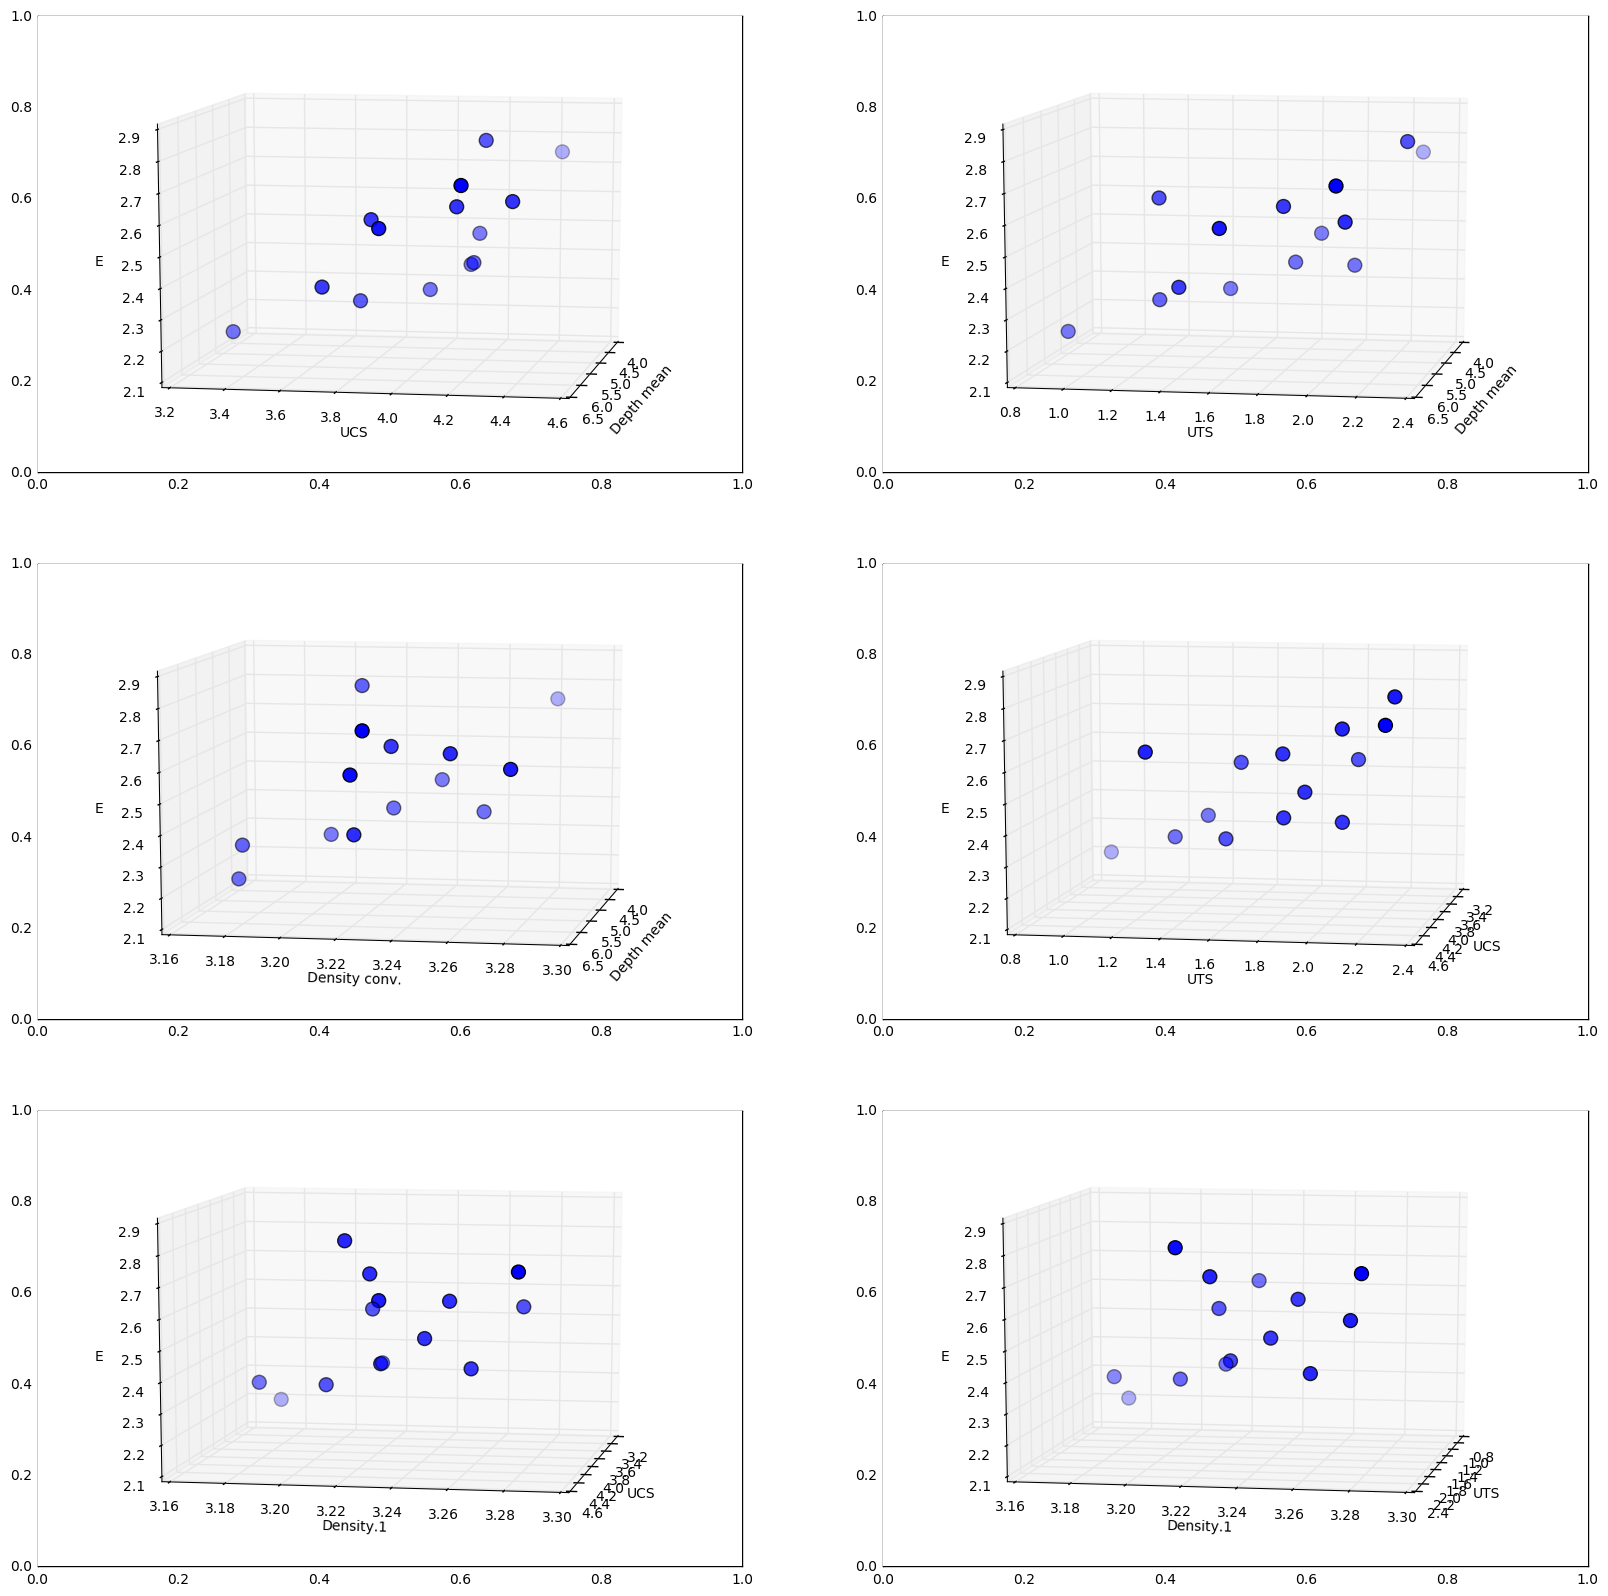

In [1120]:
fig, axs = plt.subplots(3, 2, figsize = (20, 20), squeeze = 0)
ax1 = fig.add_subplot(321, projection = '3d', xlabel = 'Depth mean', ylabel = 'UCS', zlabel = 'E')
ax2 = fig.add_subplot(322, projection = '3d', xlabel = 'Depth mean', ylabel = 'UTS', zlabel = 'E')
ax3 = fig.add_subplot(323, projection = '3d', xlabel = 'Depth mean', ylabel = 'Density conv.', zlabel = 'E')
ax4 = fig.add_subplot(324, projection = '3d', xlabel = 'UCS', ylabel = 'UTS', zlabel = 'E')
ax5 = fig.add_subplot(325, projection = '3d', xlabel = 'UCS', ylabel = 'Density.1', zlabel = 'E')
ax6 = fig.add_subplot(326, projection = '3d', xlabel = 'UTS', ylabel = 'Density.1', zlabel = 'E')
ax1.scatter(df2['Depth mean'].values, df2['UCS'].values, df2['E'].values, s = 100)
ax2.scatter(df2['Depth mean'].values, df2['UTS'].values, df2['E'].values, s = 100)
ax3.scatter(df2['Depth mean'].values, df2['Density.1'].values, df2['E'].values, s = 100)
ax4.scatter(df2['UCS'].values, df2['UTS'].values, df2['E'].values, s = 100)
ax5.scatter(df2['UCS'].values, df2['Density.1'].values, df2['E'].values, s = 100)
ax6.scatter(df2['UTS'].values, df2['Density.1'].values, df2['E'].values, s = 100)
ax1.view_init(10, 10)
ax2.view_init(10, 10)
ax3.view_init(10, 10)
ax4.view_init(10, 10)
ax5.view_init(10, 10)
ax6.view_init(10, 10)

#  Third Sheet

##  

In [1121]:
sh3 = pd.read_excel('C:/users/visha/downloads/rock.xlsx', 'Sheet3', header = 0, index_col = None)

In [1122]:
sh3.head(7)

,Depth in,Depth fin,Depth mean,UCS,UTS,Density,Density.1,E,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,SHSST
0,m,m,m,MPa,MPa,g/cc,kN/cubic m,GPa,NaN,NaN,NaN,NaN,NaN
1,66.56,70.53,68.545,83.51,8.79,2.573,25.73,11.4,NaN,NaN,NaN,NaN,NaN
2,93,96,94.5,59.78,6.91,2.53932,25.39,9.79,NaN,NaN,NaN,NaN,NaN
3,117.52,120,118.76,72.69,8.8,2.62116,26.21,10.69,NaN,NaN,NaN,NaN,NaN
4,126.9,129,127.95,57.51,8.63,2.57361,25.73,10.86,NaN,NaN,NaN,NaN,NaN
5,157.73,158.63,158.18,55.7,3.71,2.45745,24.57,15.18,NaN,NaN,NaN,NaN,NaN
6,165,165.75,165.375,55.5,8.39,2.66274,26.62,9.2,NaN,NaN,NaN,NaN,NaN


In [1123]:
df3 = sh3[['Depth mean', 'UCS', 'UTS', 'Density.1', 'E']]

In [1124]:
df3.head(7)

,Depth mean,UCS,UTS,Density.1,E
0,m,MPa,MPa,kN/cubic m,GPa
1,68.545,83.51,8.79,25.73,11.4
2,94.5,59.78,6.91,25.39,9.79
3,118.76,72.69,8.8,26.21,10.69
4,127.95,57.51,8.63,25.73,10.86
5,158.18,55.7,3.71,24.57,15.18
6,165.375,55.5,8.39,26.62,9.2


In [1125]:
df3 = df3.iloc[1:,:]

In [1126]:
df3.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,68.545,83.51,8.79,25.73,11.4
2,94.5,59.78,6.91,25.39,9.79
3,118.76,72.69,8.8,26.21,10.69
4,127.95,57.51,8.63,25.73,10.86
5,158.18,55.7,3.71,24.57,15.18
6,165.375,55.5,8.39,26.62,9.2
7,180.73,61.26,7.95,25.87,10.27


In [1127]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 5 columns):
Depth mean    16 non-null object
UCS           16 non-null object
UTS           16 non-null object
Density.1     16 non-null object
E             16 non-null object
dtypes: object(5)
memory usage: 724.0+ bytes


In [1128]:
df3.mean(axis = 0)

Depth mean    202.872187
UCS            64.597500
UTS             7.453750
Density.1      25.874375
E              11.708750
dtype: float64

In [1129]:
df3 = df3.astype(float)

In [1130]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 5 columns):
Depth mean    16 non-null float64
UCS           16 non-null float64
UTS           16 non-null float64
Density.1     16 non-null float64
E             16 non-null float64
dtypes: float64(5)
memory usage: 724.0 bytes


In [1131]:
dsc3 = df3.describe()

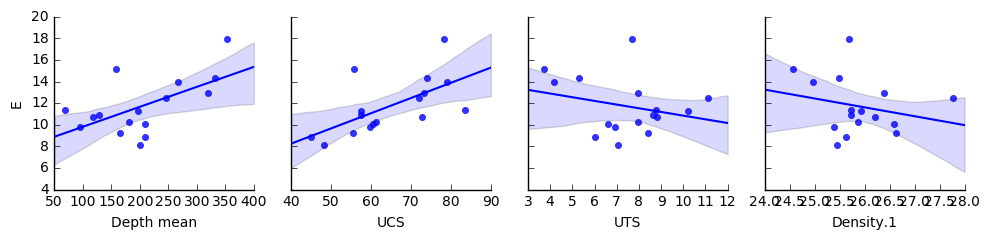

In [1132]:
sns.pairplot(df3, x_vars = ['Depth mean', 'UCS', 'UTS', 'Density.1'], y_vars = ['E'], kind = 'reg')

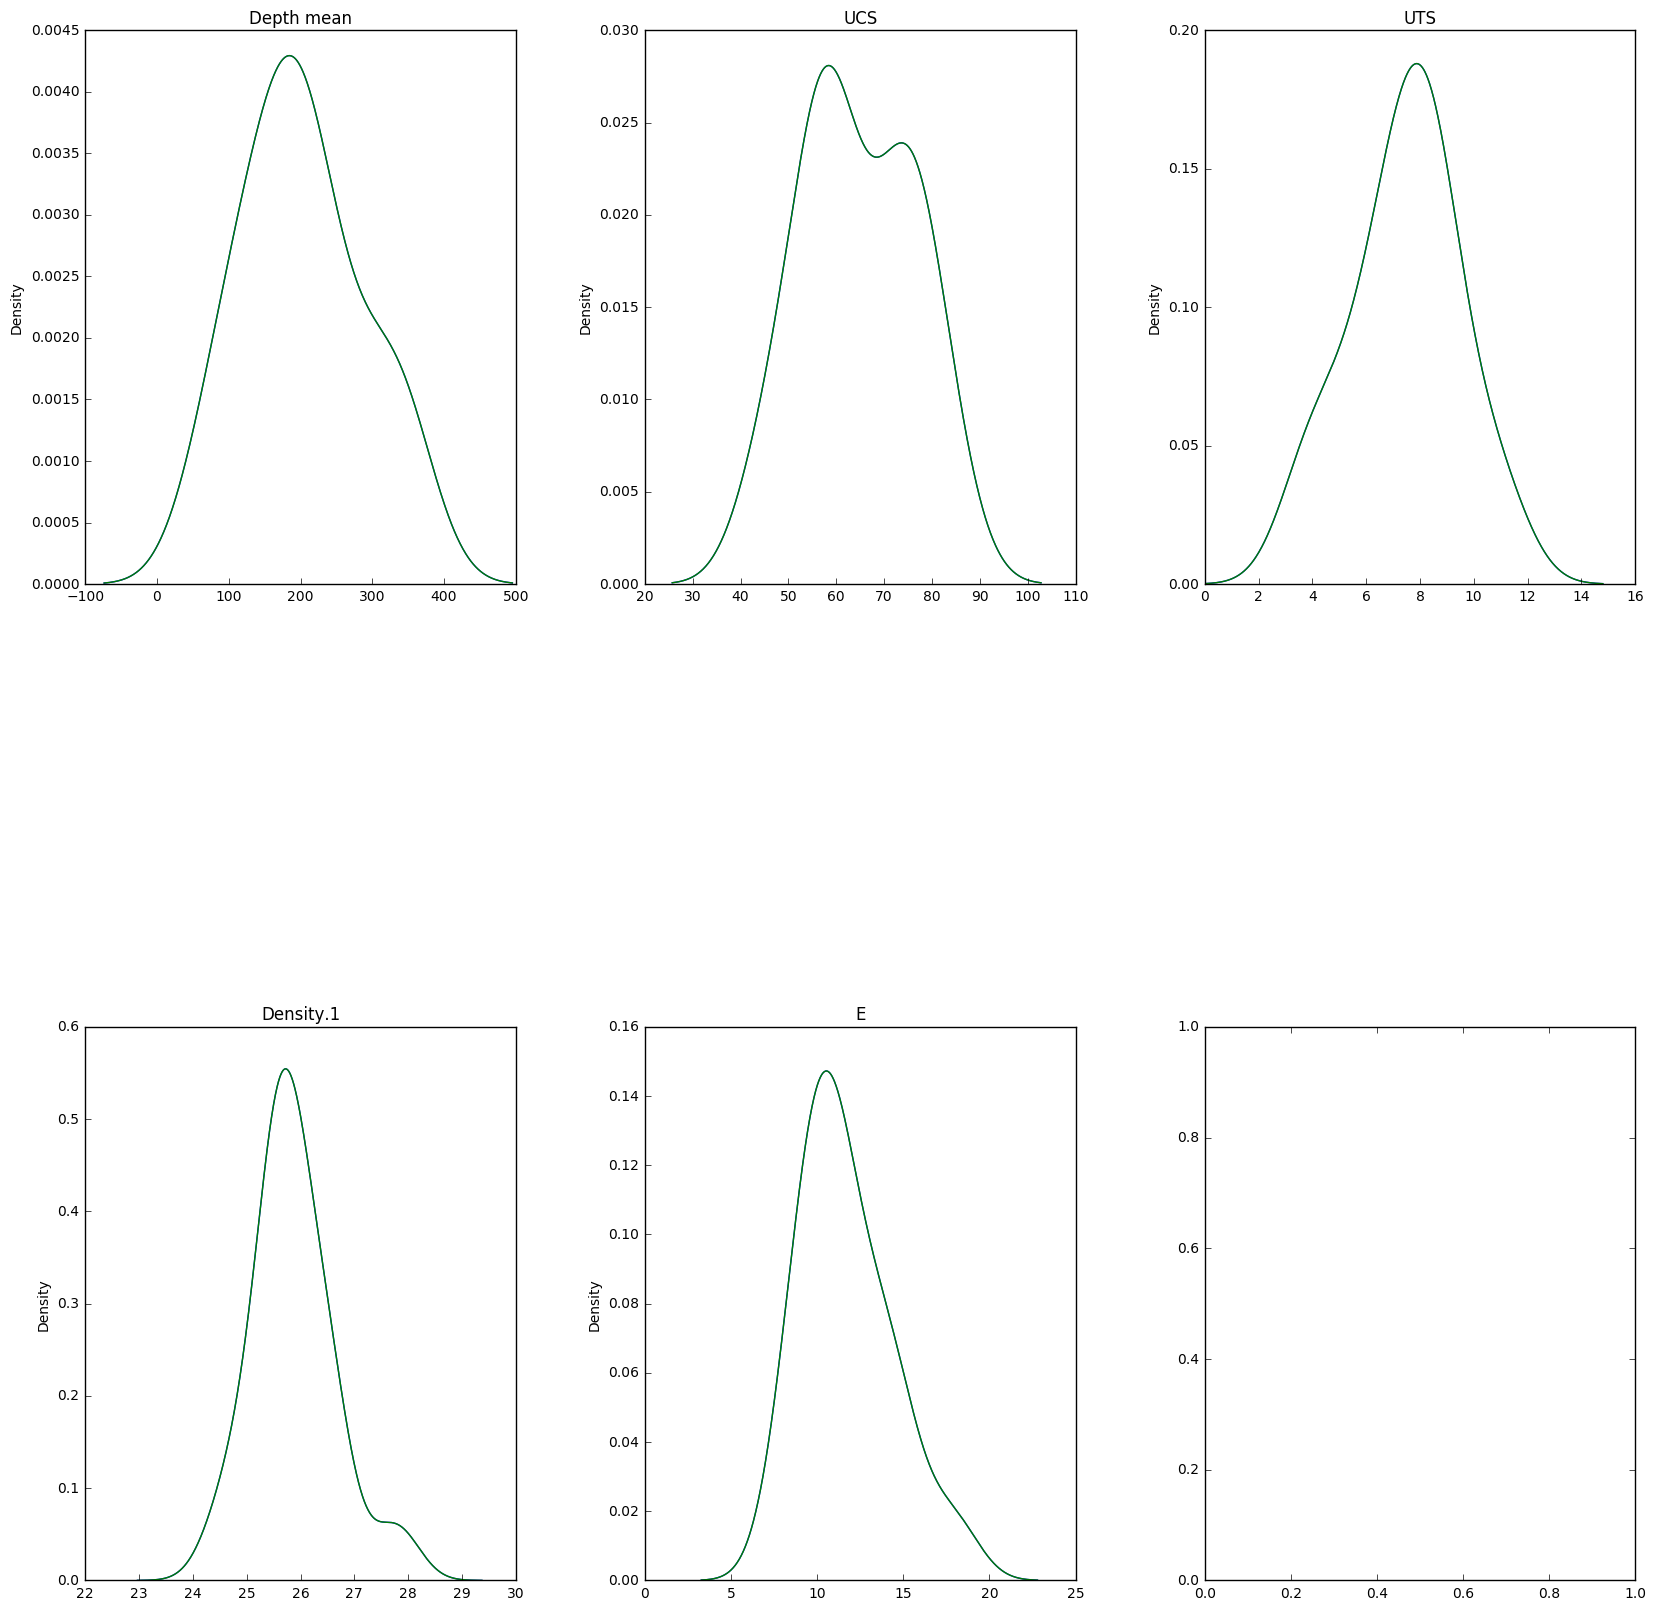

In [1133]:

%matplotlib inline


num_df3 = df3.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(2,3, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df3, axs.flat):
        g = num_df3[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [1134]:
df3['Depth mean'] = np.log(df3['Depth mean'])

In [1135]:
df3['UCS'] = np.log(df3['UCS'])

In [1136]:
df3['UTS'] = np.log(df3['UTS'])

In [1137]:
df3['Density.1'] = np.log(df3['Density.1'])

In [1138]:
df3['E'] = np.log(df3['E'])

In [1139]:
R_xx3 = df3.corr('spearman')

In [1140]:
R_xx3 = R_xx3.iloc[0:4, 0:4]

In [1141]:
R_xx3

,Depth mean,UCS,UTS,Density.1
Depth mean,1.000000,0.255882,-0.311765,0.030905
UCS,0.255882,1.000000,0.094118,0.045622
UTS,-0.311765,0.094118,1.000000,0.716704
Density.1,0.030905,0.045622,0.716704,1.000000


In [1142]:
c3 = [df3['Depth mean'].corr(df3['E']), df3['UCS'].corr(df3['E']), df3['UTS'].corr(df3['E']), df3['Density.1'].corr(df3['E'])] 

In [1143]:
c3

[0.44636168752142547,
 0.67050933590179129,
 -0.3035787708878519,
 -0.21033905968556796]

In [1144]:
c_t_3 = np.transpose(c3)

In [1145]:
z3 = np.dot(c_t_3, sp.linalg.inv(R_xx3))

In [1146]:
R_xx3.shape

(4, 4)

In [1147]:
z3

array([ 0.20325167,  0.64546335, -0.25620956, -0.06244144])

In [1148]:
R_sqr_3 = np.dot(z3, c3)

In [1149]:
R_3 = np.sqrt(R_sqr_3)

In [1150]:
R_sqr_3

0.61442661732327741

# Multiple corr coeff

In [1151]:
R_3

0.78385369637661173

#    

In [1152]:
df3.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,4.227490,4.424966,2.173615,3.247658,2.433613
2,4.548600,4.090671,1.932970,3.234355,2.281361
3,4.777105,4.286204,2.174752,3.266141,2.369309
4,4.851640,4.051959,2.155245,3.247658,2.385086
5,5.063734,4.019980,1.311032,3.201526,2.719979
6,5.108216,4.016383,2.127041,3.281663,2.219203
7,5.197004,4.115127,2.073172,3.253084,2.329227


In [1153]:
X_3 = df3[['Depth mean', 'UCS', 'UTS', 'Density.1']]
y_3 = df3['E']

In [1154]:
clf_lr_3 = lr()

In [1155]:
clf_lr_3.fit(X_3, y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Const term

In [1156]:
clf_lr_3.intercept_

6.2215002785562881

# Coeffs

In [1157]:
clf_lr_3.coef_

array([ 0.19299562,  0.79523132, -0.02818622, -2.4710439 ])

In [1158]:
pred_3 = clf_lr_3.predict(X_3)

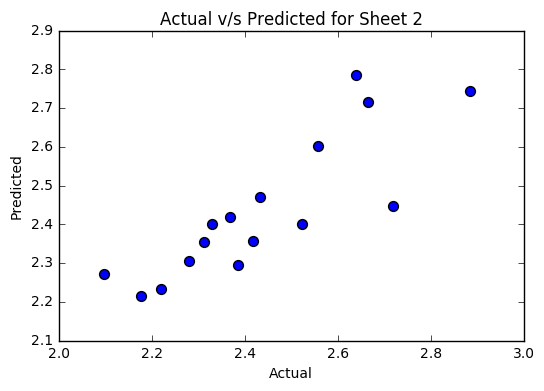

In [1159]:
%matplotlib inline
plt.scatter(y_3, pred_3, s = 50)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted for Sheet 2')

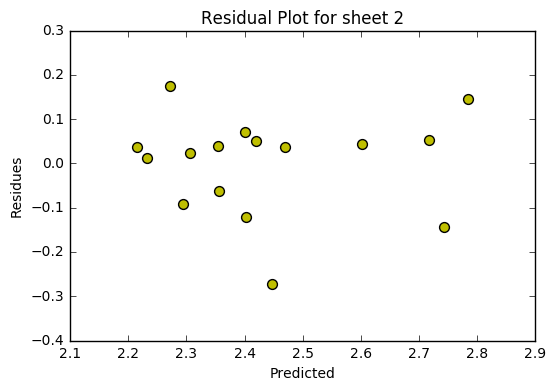

In [1160]:
plt.scatter(pred_3, pred_3 - y_3, c = 'y', s = 50)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot for sheet 2')

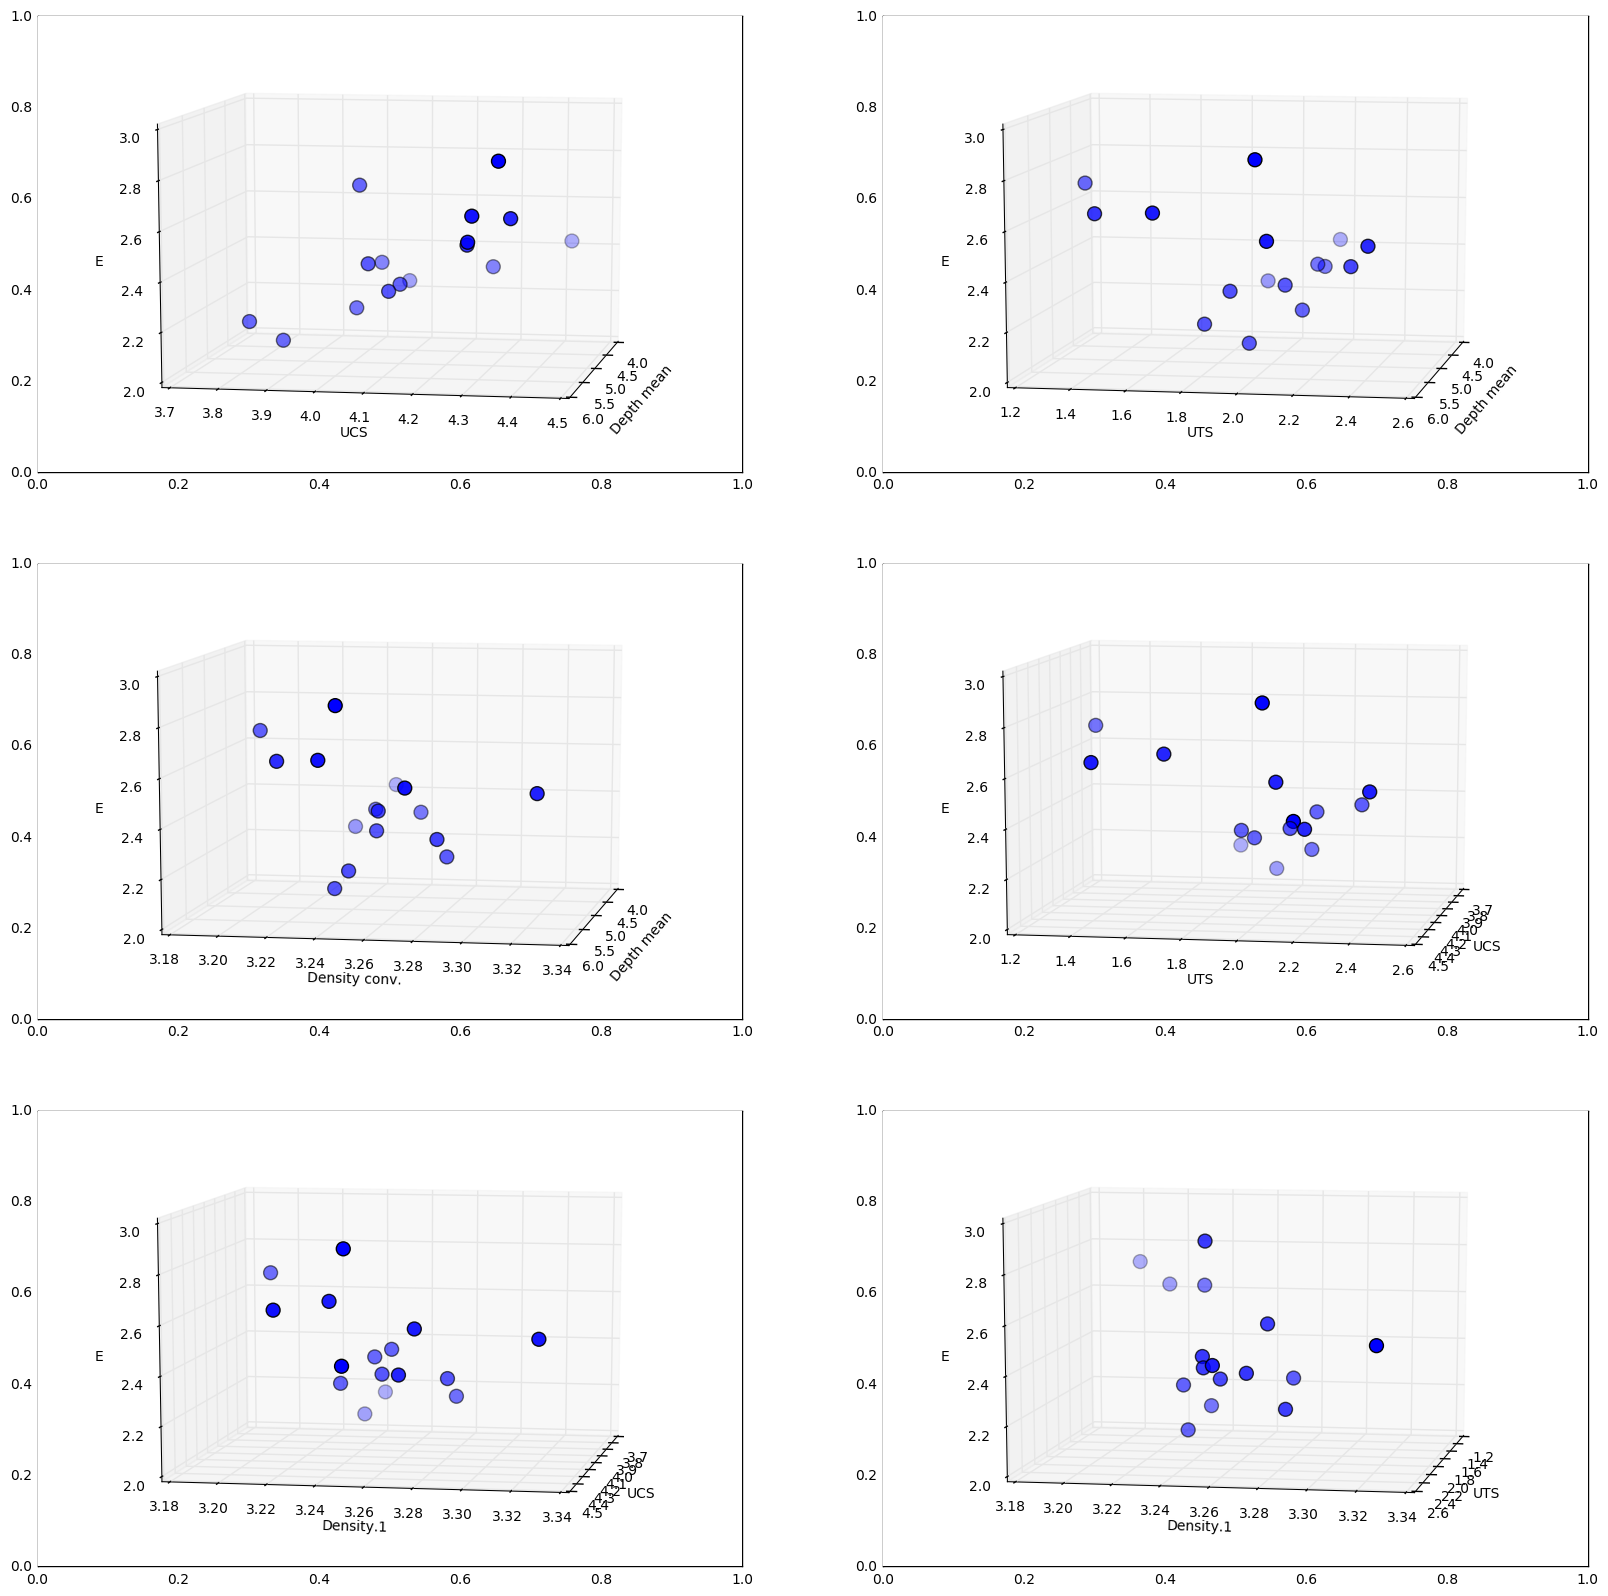

In [1161]:
fig, axs = plt.subplots(3, 2, figsize = (20, 20), squeeze = 0)
ax1 = fig.add_subplot(321, projection = '3d', xlabel = 'Depth mean', ylabel = 'UCS', zlabel = 'E')
ax2 = fig.add_subplot(322, projection = '3d', xlabel = 'Depth mean', ylabel = 'UTS', zlabel = 'E')
ax3 = fig.add_subplot(323, projection = '3d', xlabel = 'Depth mean', ylabel = 'Density conv.', zlabel = 'E')
ax4 = fig.add_subplot(324, projection = '3d', xlabel = 'UCS', ylabel = 'UTS', zlabel = 'E')
ax5 = fig.add_subplot(325, projection = '3d', xlabel = 'UCS', ylabel = 'Density.1', zlabel = 'E')
ax6 = fig.add_subplot(326, projection = '3d', xlabel = 'UTS', ylabel = 'Density.1', zlabel = 'E')
ax1.scatter(df3['Depth mean'].values, df3['UCS'].values, df3['E'].values, s = 100)
ax2.scatter(df3['Depth mean'].values, df3['UTS'].values, df3['E'].values, s = 100)
ax3.scatter(df3['Depth mean'].values, df3['Density.1'].values, df3['E'].values, s = 100)
ax4.scatter(df3['UCS'].values, df3['UTS'].values, df3['E'].values, s = 100)
ax5.scatter(df3['UCS'].values, df3['Density.1'].values, df3['E'].values, s = 100)
ax6.scatter(df3['UTS'].values, df3['Density.1'].values, df3['E'].values, s = 100)
ax1.view_init(10, 10)
ax2.view_init(10, 10)
ax3.view_init(10, 10)
ax4.view_init(10, 10)
ax5.view_init(10, 10)
ax6.view_init(10, 10)

#  Fourth Sheet

##  

In [1162]:
sh4 = pd.read_excel('C:/users/visha/downloads/rock.xlsx', 'Sheet4', header = 0, index_col = None)

In [1163]:
sh4.head(7)

,Depth in,Depth fin,Depth mean,UCS,UTS,Density,Density.1,E,Unnamed: 8,Unnamed: 9,Unnamed: 10,SSMGCG
0,m,m,m,MPa,MPa,g/cc,kN/cubic m,GPa,NaN,NaN,NaN,NaN
1,155.06,155.35,155.205,77,5.38,2.52171,25.21,13.63,NaN,NaN,NaN,NaN
2,159,165,162,64.69,6.81,2.53798,25.37,10.62,NaN,NaN,NaN,NaN
3,165.75,174.59,170.17,44.22,4.95,2.39473,23.94,10.57,NaN,NaN,NaN,NaN
4,179.06,180,179.53,71.87,5.69,2.57735,25.77,10.69,NaN,NaN,NaN,NaN
5,200.35,201.1,200.725,37.25,4.83,2.42038,24.2,7.57,NaN,NaN,NaN,NaN
6,201.61,202.59,202.1,46.53,3.59,2.37871,23.78,9.27,NaN,NaN,NaN,NaN


In [1164]:
df4 = sh4[['Depth mean', 'UCS', 'UTS', 'Density.1', 'E']]

In [1165]:
df4.head(7)

,Depth mean,UCS,UTS,Density.1,E
0,m,MPa,MPa,kN/cubic m,GPa
1,155.205,77,5.38,25.21,13.63
2,162,64.69,6.81,25.37,10.62
3,170.17,44.22,4.95,23.94,10.57
4,179.53,71.87,5.69,25.77,10.69
5,200.725,37.25,4.83,24.2,7.57
6,202.1,46.53,3.59,23.78,9.27


In [1166]:
df4 = df4.iloc[1:,:]

In [1167]:
df4.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,155.205,77,5.38,25.21,13.63
2,162,64.69,6.81,25.37,10.62
3,170.17,44.22,4.95,23.94,10.57
4,179.53,71.87,5.69,25.77,10.69
5,200.725,37.25,4.83,24.2,7.57
6,202.1,46.53,3.59,23.78,9.27
7,203.87,48.54,5.52,23.77,10.65


In [1168]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 1 to 22
Data columns (total 5 columns):
Depth mean    22 non-null object
UCS           22 non-null object
UTS           22 non-null object
Density.1     22 non-null object
E             22 non-null object
dtypes: object(5)
memory usage: 964.0+ bytes


In [1169]:
df4.mean(axis = 0)

Depth mean    241.884545
UCS            51.544091
UTS             4.860455
Density.1      24.624091
E              10.808182
dtype: float64

In [1170]:
df4 = df4.astype(float)

In [1171]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 1 to 22
Data columns (total 5 columns):
Depth mean    22 non-null float64
UCS           22 non-null float64
UTS           22 non-null float64
Density.1     22 non-null float64
E             22 non-null float64
dtypes: float64(5)
memory usage: 964.0 bytes


In [1172]:
dsc4 = df4.describe()

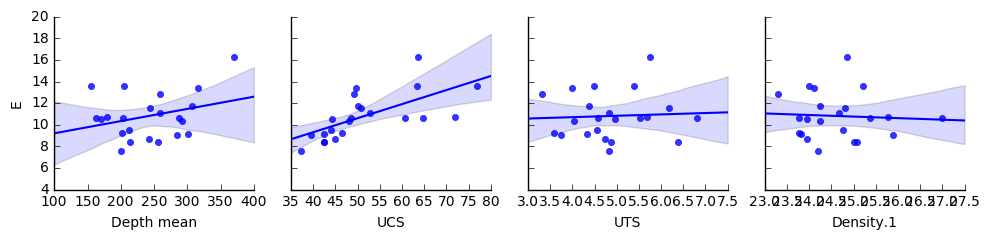

In [1173]:
sns.pairplot(df4, x_vars = ['Depth mean', 'UCS', 'UTS', 'Density.1'], y_vars = ['E'], kind = 'reg')

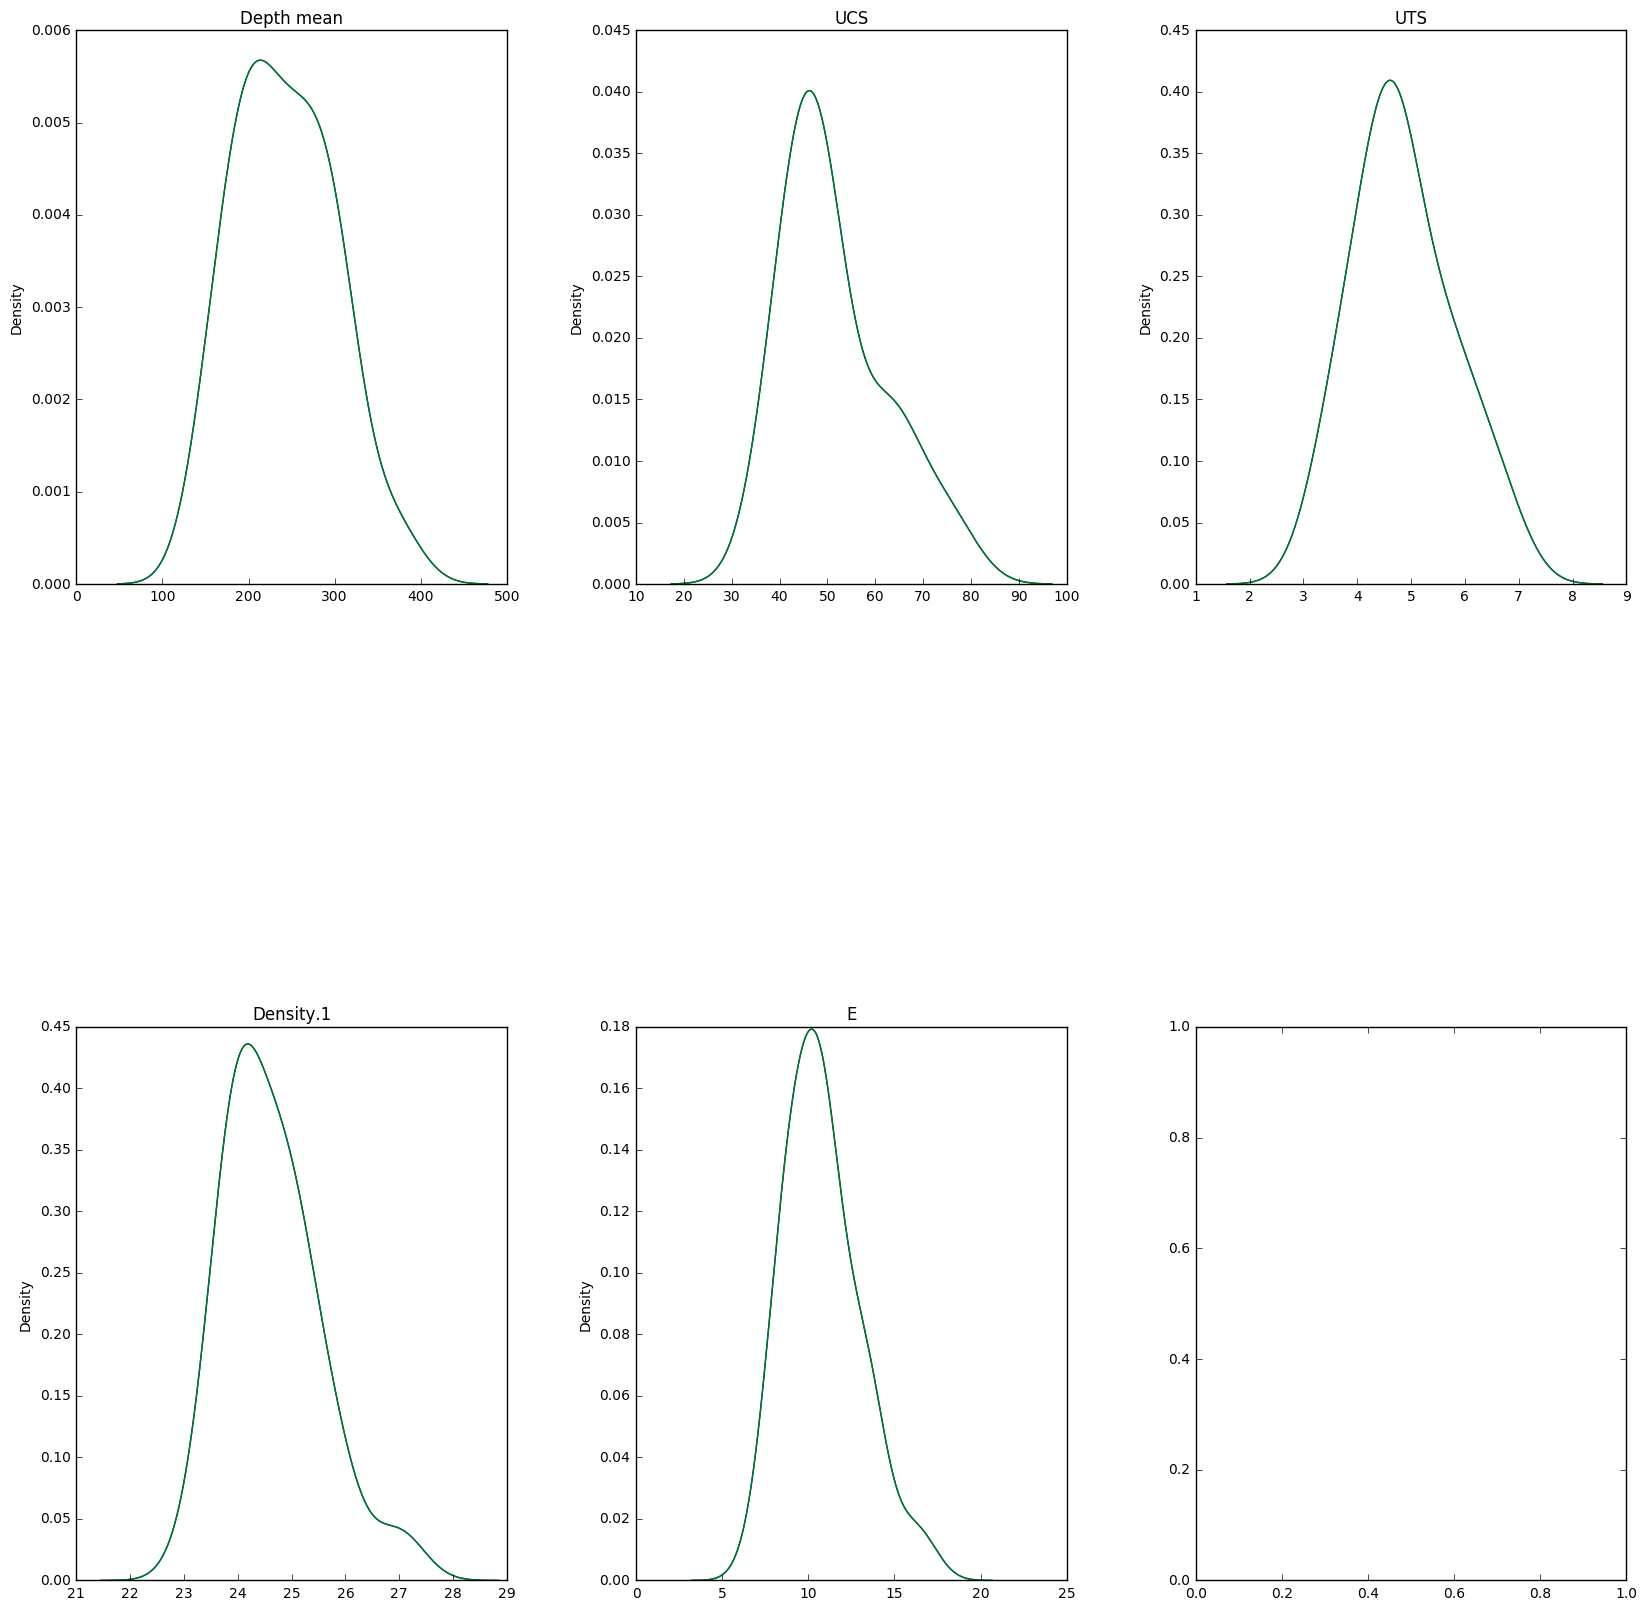

In [1174]:

%matplotlib inline


num_df4 = df4.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(2,3, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df4, axs.flat):
        g = num_df4[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [1175]:
df4['Depth mean'] = np.log(df4['Depth mean'])

In [1176]:
df4['UCS'] = np.log(df4['UCS'])

In [1177]:
df4['UTS'] = np.log(df4['UTS'])

In [1178]:
df4['Density.1'] = np.log(df4['Density.1'])

In [1179]:
df4['E'] = np.log(df4['E'])

In [1180]:
R_xx4 = df4.corr('spearman')

In [1181]:
R_xx4 = R_xx4.iloc[0:4, 0:4]

In [1182]:
R_xx4

,Depth mean,UCS,UTS,Density.1
Depth mean,1.000000,-0.119142,-0.442123,-0.034454
UCS,-0.119142,1.000000,0.326934,0.297656
UTS,-0.442123,0.326934,1.000000,0.433211
Density.1,-0.034454,0.297656,0.433211,1.000000


In [1183]:
c4 = [df4['Depth mean'].corr(df4['E']), df4['UCS'].corr(df4['E']), df4['UTS'].corr(df4['E']), df4['Density.1'].corr(df4['E'])] 

In [1184]:
c4

[0.20084997854094799,
 0.70860307884903351,
 0.03504188473928263,
 -0.052577001046979134]

In [1185]:
c_t_4 = np.transpose(c4)

In [1186]:
z4 = np.dot(c_t_4, sp.linalg.inv(R_xx4))

In [1187]:
R_xx4.shape

(4, 4)

In [1188]:
z4

array([ 0.30145856,  0.82442331,  0.02877754, -0.30005201])

In [1189]:
R_sqr_4 = np.dot(z4, c4)

In [1190]:
R_4 = np.sqrt(R_sqr_4)

In [1191]:
R_sqr_4

0.66152109511881152

# Multiple corr coeff

In [1192]:
R_4

0.81333947101982673

#    

In [1193]:
df4.head(7)

,Depth mean,UCS,UTS,Density.1,E
1,5.044747,4.343805,1.682688,3.227241,2.612273
2,5.087596,4.169607,1.918392,3.233567,2.362739
3,5.136798,3.789177,1.599388,3.175551,2.358020
4,5.190342,4.274859,1.738710,3.249211,2.369309
5,5.301936,3.617652,1.574846,3.186353,2.024193
6,5.308763,3.840097,1.278152,3.168845,2.226783
7,5.317483,3.882388,1.708378,3.168424,2.365560


In [1194]:
X_4 = df4[['Depth mean', 'UCS', 'UTS', 'Density.1']]
y_4 = df4['E']

In [1195]:
clf_lr_4 = lr()

In [1196]:
clf_lr_4.fit(X_4, y_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Const term

In [1197]:
clf_lr_4.intercept_

3.8057762591197521

# Coeffs

In [1198]:
clf_lr_4.coef_

array([ 0.33728507,  0.92592511, -0.00762234, -2.15601812])

In [1199]:
pred_4 = clf_lr_4.predict(X_4)

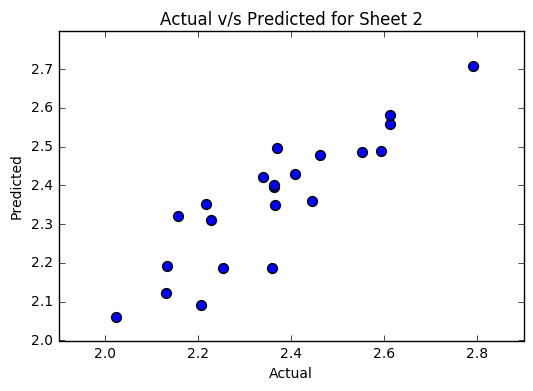

In [1200]:
%matplotlib inline
plt.scatter(y_4, pred_4, s = 50)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted for Sheet 2')

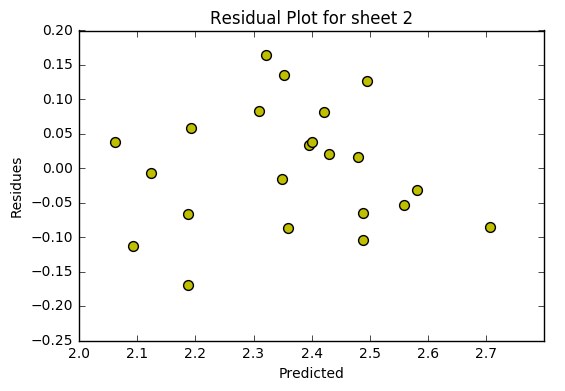

In [1201]:
plt.scatter(pred_4, pred_4 - y_4, c = 'y', s = 50)
plt.xlabel('Predicted')
plt.ylabel('Residues')
plt.title('Residual Plot for sheet 2')

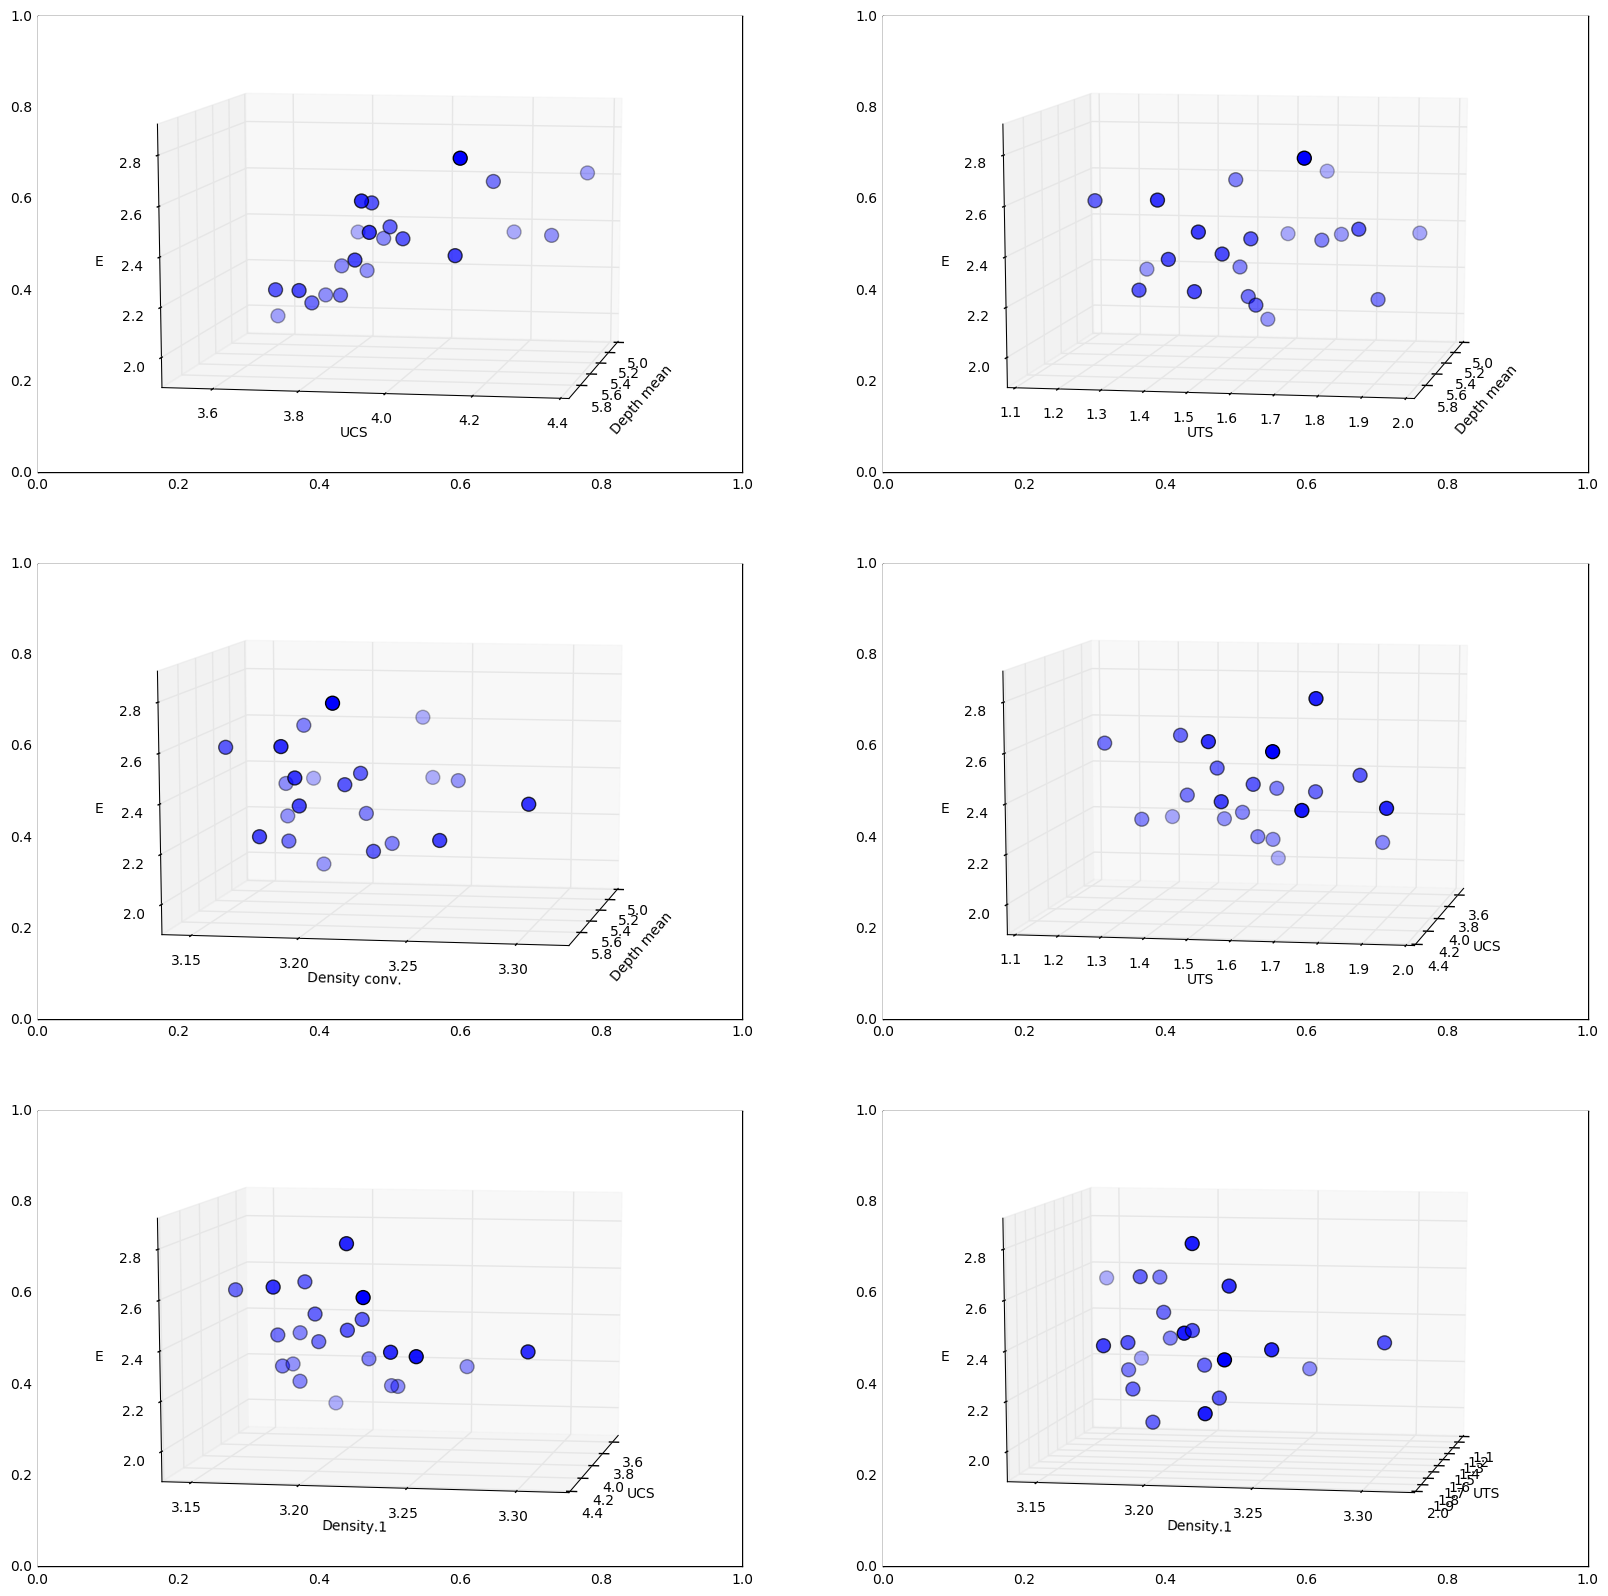

In [1202]:
fig, axs = plt.subplots(3, 2, figsize = (20, 20), squeeze = 0)
ax1 = fig.add_subplot(321, projection = '3d', xlabel = 'Depth mean', ylabel = 'UCS', zlabel = 'E')
ax2 = fig.add_subplot(322, projection = '3d', xlabel = 'Depth mean', ylabel = 'UTS', zlabel = 'E')
ax3 = fig.add_subplot(323, projection = '3d', xlabel = 'Depth mean', ylabel = 'Density conv.', zlabel = 'E')
ax4 = fig.add_subplot(324, projection = '3d', xlabel = 'UCS', ylabel = 'UTS', zlabel = 'E')
ax5 = fig.add_subplot(325, projection = '3d', xlabel = 'UCS', ylabel = 'Density.1', zlabel = 'E')
ax6 = fig.add_subplot(326, projection = '3d', xlabel = 'UTS', ylabel = 'Density.1', zlabel = 'E')
ax1.scatter(df4['Depth mean'].values, df4['UCS'].values, df4['E'].values, s = 100)
ax2.scatter(df4['Depth mean'].values, df4['UTS'].values, df4['E'].values, s = 100)
ax3.scatter(df4['Depth mean'].values, df4['Density.1'].values, df4['E'].values, s = 100)
ax4.scatter(df4['UCS'].values, df4['UTS'].values, df4['E'].values, s = 100)
ax5.scatter(df4['UCS'].values, df4['Density.1'].values, df4['E'].values, s = 100)
ax6.scatter(df4['UTS'].values, df4['Density.1'].values, df4['E'].values, s = 100)
ax1.view_init(10, 10)
ax2.view_init(10, 10)
ax3.view_init(10, 10)
ax4.view_init(10, 10)
ax5.view_init(10, 10)
ax6.view_init(10, 10)

In [1203]:
dsc1

,Depth mean,UCS,UTS,Density conv.,E
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,251.806894,56.955758,6.634697,25.341061,11.122273
std,111.796099,17.281604,2.324167,2.278409,3.157884
min,10.820000,19.840000,1.380000,15.898400,3.540000
25%,178.375000,44.760000,4.845000,24.518725,9.100000
50%,257.982500,57.415000,6.775000,25.259800,10.635000
75%,330.713750,69.685000,8.105000,25.962300,12.720000
max,440.725000,120.080000,12.870000,34.717700,21.810000


In [1204]:
dsc2 

,Depth mean,UCS,UTS,Density.1,E
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,256.749286,58.394286,6.096429,25.265714,12.638571
std,101.499944,15.384359,2.334133,0.819950,2.315625
min,78.205000,27.360000,2.410000,23.880000,9.010000
25%,185.183750,47.470000,4.200000,24.945000,10.847500
50%,262.035000,63.745000,6.130000,25.185000,12.725000
75%,306.308750,66.380000,7.862500,25.805000,14.032500
max,426.475000,84.270000,9.780000,26.620000,16.820000


In [1205]:
dsc3

,Depth mean,UCS,UTS,Density.1,E
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,202.872187,64.597500,7.453750,25.874375,11.708750
std,83.775782,11.560708,2.001226,0.743424,2.613875
min,68.545000,44.970000,3.710000,24.570000,8.150000
25%,150.622500,57.057500,6.452500,25.472500,10.030000
50%,198.410000,60.835000,7.825000,25.730000,11.045000
75%,250.662500,73.405000,8.670000,26.255000,13.182500
max,353.000000,83.510000,11.100000,27.770000,17.910000


In [1206]:
dsc4

,Depth mean,UCS,UTS,Density.1,E
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,241.884545,51.544091,4.860455,24.624091,10.808182
std,56.745913,10.738274,0.913510,0.868297,2.125408
min,155.205000,37.250000,3.320000,23.300000,7.570000
25%,202.542500,44.107500,4.335000,23.960000,9.195000
50%,242.937500,48.800000,4.780000,24.455000,10.620000
75%,286.815000,58.767500,5.485000,25.060000,11.682500
max,370.060000,77.000000,6.810000,27.000000,16.310000
